In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib.dates as dates
import matplotlib.ticker as ticker


In [2]:
df=pd.read_csv("Resources/VITA-MINE.csv")
df.tail(3)

,RA_Report #,Year/Month,Year,PRI_Reported Brand/Product Name,Type,Brand/Product,CI_Gender,CI_Age at Adverse Event,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Outcome,Severity
35237,214407,2017-06,2017,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,NaN,Female,92.0,"OTHER SERIOUS (IMPORTANT MEDICAL EVENTS), HOSP...","DIVERTICULITIS, EYE DISORDER, HAEMORRHAGE, OCU...",HOSPITALIZATION,3
35238,214516,2017-06,2017,CALTRATE CALCIUM,CALCIUM,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3
35239,214516,2017-06,2017,VITAMIN D3,VITAMIN D,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3


In [3]:
#### neal py code

In [4]:
aa=df.groupby("Severity")["Outcome"].count()


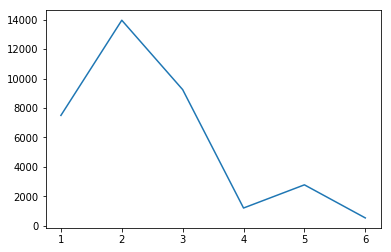

In [5]:
plt.plot(aa)
plt.show()

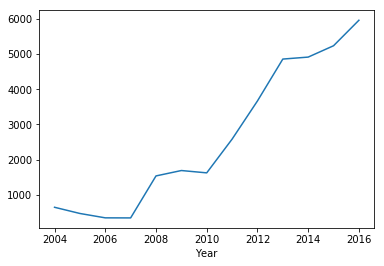

In [6]:
b=df.groupby("Year")["Outcome"].count()
b[:-1].plot()


In [7]:
c=df.groupby("Year/Month")["Outcome"].count()
c2016=c[:-5]
c20161=c[:-7]
df1=pd.DataFrame(c2016)
df1.reset_index(inplace=True)



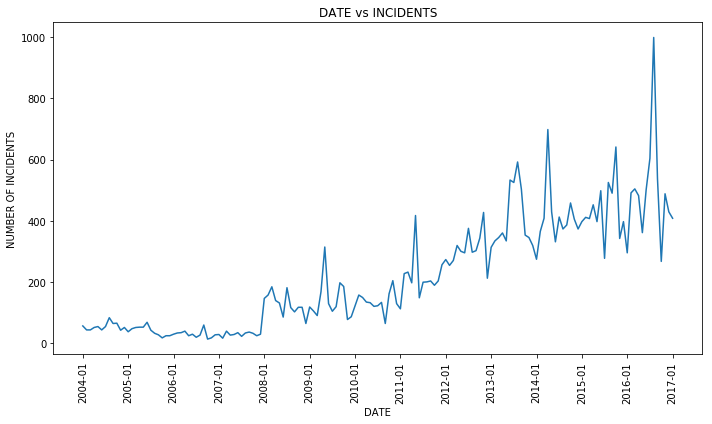

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot_date(df1["Year/Month"], c2016, '-')
plt.xticks(rotation='vertical')
loc = ticker.MultipleLocator(base=12) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.title("DATE vs INCIDENTS")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("DATE")
plt.tight_layout()
plt.show()

In [9]:
#from graph above, we see that the # of incident vs time follows geometric brownian motion
#so we will use monte carlo method to simulate the # of incident each month for next 10 years
creturn=np.log(1+c2016.pct_change())
u=np.array([creturn.mean()])
stdev=np.array([creturn.std()])
t_interval=120
iteration=100000
drift=u-.5*stdev**2
monthlychange=np.exp(drift+stdev*norm.ppf(np.random.rand(t_interval,iteration)))

In [10]:
Simulation=np.zeros_like(monthlychange)
Simulation[0]=c20161[-1]
for x in range(1,t_interval):
    Simulation[x]=Simulation[x-1]*monthlychange[x]

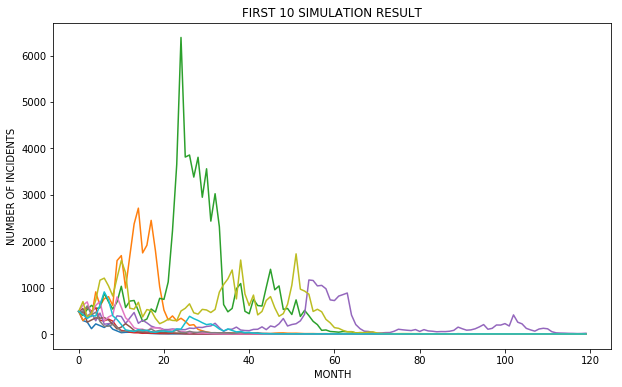

In [11]:
plt.figure(figsize=(10,6))
plt.plot(Simulation[:,:10])
plt.title("FIRST 10 SIMULATION RESULT")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.show()

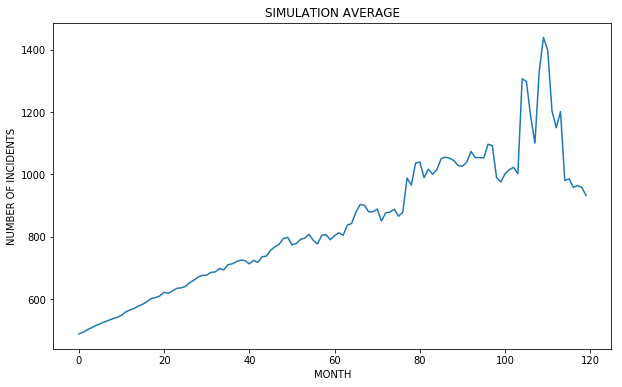

In [12]:
a=[]
for x in range(t_interval):
    a.append(Simulation[x].mean())
plt.figure(figsize=(10,6))
plt.plot(a)
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.title("SIMULATION AVERAGE")
plt.savefig('Image/SIMULATION_RESULT.png')
plt.show()
